In [1]:
from PyQt5 import QtCore, QtGui, QtWidgets

class About_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(800, 400)
        MainWindow.setMinimumSize(QtCore.QSize(800, 400))
        MainWindow.setMaximumSize(QtCore.QSize(800, 400))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(0, 0, 800, 400))
        self.label.setMinimumSize(QtCore.QSize(800, 400))
        self.label.setMaximumSize(QtCore.QSize(800, 400))
        self.label.setText("")
        self.label.setObjectName("label")
        MainWindow.setCentralWidget(self.centralwidget)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate

print("软件窗口设置")

软件窗口设置


In [2]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Attention_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(400, 200)
        MainWindow.setMinimumSize(QtCore.QSize(400, 200))
        MainWindow.setMaximumSize(QtCore.QSize(400, 200))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.lineEdit = QtWidgets.QLineEdit(self.centralwidget)
        self.lineEdit.setGeometry(QtCore.QRect(50, 70, 301, 41))
        self.lineEdit.setObjectName("lineEdit")
        self.pushButton_no = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_no.setGeometry(QtCore.QRect(250, 125, 100, 50))
        self.pushButton_no.setMinimumSize(QtCore.QSize(100, 50))
        self.pushButton_no.setText("")
        self.pushButton_no.setObjectName("pushButton_no")
        self.pushButton_yes = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton_yes.setGeometry(QtCore.QRect(50, 125, 100, 50))
        self.pushButton_yes.setMinimumSize(QtCore.QSize(100, 50))
        self.pushButton_yes.setText("")
        self.pushButton_yes.setObjectName("pushButton_yes")
        MainWindow.setCentralWidget(self.centralwidget)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "关注窗体"))

print("设置关注界面")

设置关注界面


In [3]:
# 图形画布
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import matplotlib  # 导入图表模块
import matplotlib.pyplot as plt # 导入绘图模块


class PlotCanvas(FigureCanvas):

    def __init__(self, parent=None, width=0, height=0, dpi=100):
        # 避免中文乱码
        matplotlib.rcParams['font.sans-serif'] = ['SimHei']
        matplotlib.rcParams['axes.unicode_minus'] = False
        # 创建图形
        fig = plt.figure(dpi=dpi)
        # 初始化图形画布
        FigureCanvas.__init__(self, fig)
        self.setParent(parent)  # 设置父类

    # 显示商品分类饼图
    def pie_chart(self, size):
        """
        绘制饼图
        explode：设置各部分突出
        label:设置各部分标签
        labeldistance:设置标签文本距圆心位置，1.1表示1.1倍半径
        autopct：设置圆里面文本
        shadow：设置是否有阴影
        startangle：起始角度，默认从0开始逆时针转
        pctdistance：设置圆内文本距圆心距离
        返回值
        l_text：圆内部文本，matplotlib.text.Text object
        p_text：圆外部文本
        """
        label_list = [ '联想','华硕','惠普','戴尔','其它']  # 各部分标签
        plt.pie(size, labels=label_list,  labeldistance=1.1,
                autopct="%1.1f%%", shadow=False, startangle=30, pctdistance=0.6)
        plt.axis("equal")  # 设置横轴和纵轴大小相等，这样饼才是圆的


print("设置饼图")

设置饼图


In [4]:
import requests # 网络请求模块
from urllib.request import urlretrieve  # 直接远程下载图片
import shutil      # 文件夹控制
import json        # 导入json模块
import re          # 导入re模块
import os          # os模块
rankings_list = []  # 保存排行数据的列表

class Crawl(object):

    # 获取排行
    def get_rankings_json(self, url):
        self.jd_id_list = []  # 保存京东id的列表
        self.name_list = []  # 保存商品名称的列表
        self.good_list =[]   # 保存好评率的列表
        response = requests.get(url)  # 发送网络请求，获取服务器响应
        json_str = str(response.json())  # 将请求结果的json信息转换为字符串
        dict_json = eval(json_str)       # 将json字符串信息转换为字典，方便提取信息
        jd_id_str =''
        # 每次获取数据之前，先将保存图片的文件夹清空，清空后再创建目录
        if os.path.exists('img_download'): # 判断img目录是否存在
            shutil.rmtree('img_download') # 删除img目录
            os.makedirs('img_download')  # 创建img目录
        for index,i in enumerate(dict_json['products']):
            id = i['wareId']        # 京东id号码
            J_id = 'J_'+i['wareId'] # 京东id，添加J_用于作为获取价格参数
            self.jd_id_list.append(id) # 将商品id添加至列表中
            name = i['wareName']  # 商品名称
            self.name_list.append(name) # 将商品名称添加至列表中
            good = i['GoodRate']  # 好评率
            self.good_list.append(str(good)+'%') # 将好评率添加至列表中
            jd_id_str = jd_id_str + J_id+',' # 拼接京东id字符串
            if index<=10:
                # 图片地址
                imgPath = 'http://img13.360buyimg.com/n1/s320x320_'+i['imgPath']
                urlretrieve(imgPath,'img_download/'+str(index)+'.jpg') # 根据下标命名图片名称
        return jd_id_str

    # 获取商品价格
    def get_price(self, id):
        rankings_list.clear() # 清空排行数据的列表
        price_url = 'http://p.3.cn/prices/mgets?type=1&skuIds={id_str}' # 获取价格的网络请求地址
        response = requests.get(price_url.format(id_str=id))  # 将京东id作为参数发送获取商品价格的网络请求
        price = response.json()  # 获取价格json数据，该数据为list类型
        for index, item in enumerate(price):
            # 商品名称
            name = self.name_list[index]
            # 京东价格
            jd_price = item['p']
            # 每个商品的京东id
            jd_id = self.jd_id_list[index]
            # 好评率
            good = self.good_list[index]
            # 将所有数据添加到列表中
            rankings_list.append((index+1,name, jd_price, jd_id,good))
        return rankings_list # 返回所有排行数据列表

    # 获取评价内容,score参数差评为1、中评为2、好评为3，0为全部
    def get_evaluation(self, score, id):
        # 创建头部信息
        headers = {'User-Agent': 'OW64; rv:59.0) Gecko/20100101 Firefox/59.0'}
        # 评价请求地址参数，callback为对应书名json的id，
        # productId书名对应的京东id
        # score评价等级参数差评为1、中评为2、好评为3，0为全部
        # sortType类型，6为时间排序，5为推荐排序
        # pageSize每页显示评价10条
        # page页数
        params = {
            'callback': 'fetchJSON_comment98vv10635',
            'productId': id,
            'score': score,
            'sortType': 6,
            'pageSize': 10,
            'isShadowSku': 0,
            'page': 0,
        }
        # 评价请求地址
        url = 'https://club.jd.com/comment/skuProductPageComments.action'
        # 发送请求
        evaluation_response = requests.get(url, params=params,headers=headers)
        if evaluation_response.status_code == 200:
            evaluation_response = evaluation_response.text
            try:
                # 去除json外层的括号与名称
                t = re.search(r'({.*})', evaluation_response).group(0)
            except Exception as e:
                print('评价的json数据匹配异常！')
            j = json.loads(t)  # 加载json数据
            commentSummary = j['comments']
            for comment in commentSummary:
                # 评价内容
                c_contetn = comment['content']
                # 时间
                c_time = comment['creationTime']
                # 京东昵称
                c_name = comment['nickname']
                # 好评差评 1差评 2-3 中评 4-5好评
                c_score = comment['score']
            # 判断没有指定的评价内容时
            if len(commentSummary) == 0:
                # 返回无
                return  '无'
            else:
                # 根据不同需求返回不同数据，这里仅返回最新的评价时间
                return  commentSummary[0]['creationTime']

print("爬取数据")

爬取数据


In [5]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Evaluate_Warning_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(900, 300)
        MainWindow.setMinimumSize(QtCore.QSize(900, 300))
        MainWindow.setMaximumSize(QtCore.QSize(900, 300))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.tableWidget = QtWidgets.QTableWidget(self.centralwidget)
        self.tableWidget.setGeometry(QtCore.QRect(0, 0, 900, 300))
        self.tableWidget.setObjectName("tableWidget")
        self.tableWidget.setColumnCount(3)
        self.tableWidget.setRowCount(0)
        item = QtWidgets.QTableWidgetItem()
        font = QtGui.QFont()
        font.setPointSize(12)
        font.setBold(True)
        font.setWeight(75)
        item.setFont(font)
        self.tableWidget.setHorizontalHeaderItem(0, item)
        item = QtWidgets.QTableWidgetItem()
        font = QtGui.QFont()
        font.setPointSize(12)
        font.setBold(True)
        font.setWeight(75)
        item.setFont(font)
        self.tableWidget.setHorizontalHeaderItem(1, item)
        item = QtWidgets.QTableWidgetItem()
        font = QtGui.QFont()
        font.setPointSize(12)
        font.setBold(True)
        font.setWeight(75)
        item.setFont(font)
        self.tableWidget.setHorizontalHeaderItem(2, item)
        MainWindow.setCentralWidget(self.centralwidget)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "评价预警窗口"))
        item = self.tableWidget.horizontalHeaderItem(0)
        item.setText(_translate("MainWindow", "关注商品的名称"))
        item = self.tableWidget.horizontalHeaderItem(1)
        item.setText(_translate("MainWindow", "最新的中评信息"))
        item = self.tableWidget.horizontalHeaderItem(2)
        item.setText(_translate("MainWindow", "最新的差评信息"))

print("展示关注商品评价变化")

展示关注商品评价变化


In [6]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Heat_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1040, 600)
        MainWindow.setMinimumSize(QtCore.QSize(1040, 600))
        MainWindow.setMaximumSize(QtCore.QSize(1040, 600))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(0, 0, 1040, 70))
        font = QtGui.QFont()
        font.setPointSize(12)
        font.setBold(True)  # 字体加粗
        self.label.setFont(font)
        self.label.setAlignment(QtCore.Qt.AlignCenter)
        self.label.setObjectName("label")
        self.tableWidget = QtWidgets.QTableWidget(self.centralwidget)
        self.tableWidget.setGeometry(QtCore.QRect(0, 69, 1040, 530))
        self.tableWidget.setEditTriggers(QtWidgets.QAbstractItemView.NoEditTriggers)
        self.tableWidget.setObjectName("tableWidget")
        self.tableWidget.setColumnCount(0)
        self.tableWidget.setRowCount(0)
        MainWindow.setCentralWidget(self.centralwidget)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "游戏本热卖榜"))
        self.label.setText(_translate("MainWindow", "游戏本热卖榜"))

print("显示游戏本热卖榜单")

显示游戏本热卖榜单


In [7]:
import pymysql  # 导入操作MySQL数据库模块

# 数据库字段
'''
id          编号
name        商品名称
jd_price    京东价格
jd_id       京东商品id
good        好评率 
middle_time 中评最新的时间
poor_time   差评最新的时间
'''


class MySQL(object):
    # 连接数据库
    def connection_sql(self):
        # 连接数据库
        self.db = pymysql.connect(host="localhost", user="root",
                                  password="root", db="jd_peripheral", port=3306,charset='utf8')
        return self.db

    # 关闭数据库
    def close_sql(self):
        self.db.close()

    # 排行数据插入方法,该方法可以根据更换表名插入排行数据
    def insert_ranking(self, cur, value, table):
        # 插入数据的sql语句
        sql_insert = "insert into  {table} (id,name,jd_price,jd_id,good)" \
                     " values(%s,%s,%s,%s,%s)on duplicate" \
                     " key update name=values(name),jd_price=values(jd_price)," \
                     "jd_id=values(jd_id),good=values(good)".format(table=table)
        try:
            # 执行sql语句
            cur.executemany(sql_insert, value)
            # 提交
            self.db.commit()
        except Exception as e:
            # 错误回滚
            self.db.rollback()
            # 输出错误信息
            print(e)

    # 关注数据插入方法,该方法可以根据更换表名插入排行数据
    def insert_attention(self, cur, value, table):
        # 插入数据的sql语句
        sql_insert = "insert into  {table} (name,jd_price,jd_id,good,middle_time,poor_time)" \
                             " values(%s,%s,%s,%s,%s,%s)".format(table=table)
        try:
            # 执行sql语句
            cur.executemany(sql_insert, value)
            # 提交
            self.db.commit()
        except Exception as e:
            # 错误回滚
            self.db.rollback()
            # 输出错误信息
            print(e)

    # 查询排行数据表前10名商品名称,价格，好评率
    def query_top10_info(self, cur):
        query_sql = "select name,jd_price,good from jd_ranking where id<=10"
        cur.execute(query_sql)  # 执行sql语句
        results = cur.fetchall()  # 获取查询的所有记录
        return results  #返回所有数据

    # 根据id查询排行数据表数据内容
    def query_id_info(self, cur,id):
        query_sql = "select name,jd_price,jd_id,good from jd_ranking where id={id}".format(id=id)
        cur.execute(query_sql)  # 执行sql语句
        results = cur.fetchone()  # 获取查询的记录
        return results  # 返回所有数据

    # 查询关注商品的数据表中是否有相同的商品名称
    def query_is_name(self, cur, name):
        query_sql = "select count(*) from attention where name='{name}'".format(name=name)
        cur.execute(query_sql)  # 执行sql语句
        results = cur.fetchall()  # 获取查询的所有记录
        return results[0][0]  # 返回所有数据

    # 查询排行的商品信息
    def query_rankings(self, cur, table):
        query_sql = "select id,name,jd_price,jd_id,good from {table}".format(table=table)
        cur.execute(query_sql)  # 执行sql语句
        results = cur.fetchall()  # 获取查询的所有记录
        row = len(results)  # 获取信息条数，作为表格的行
        column = len(results[0])  # 获取字段数量，作为表格的列
        return row, column, results  # 返回信息行与信息列（字段对应的信息）

    # 查询排行榜中所有的商品名称
    def query_rankings_name(self, cur, table):
        name_all_list =[]  # 保存所有商品名称的列表
        query_sql = "select name from {table}".format(table=table)
        cur.execute(query_sql)  # 执行sql语句
        results = cur.fetchall()  # 获取查询的所有记录
        for r in results:
            name_all_list.append(r[0].replace(' ',''))
        return name_all_list      # 返回所有排行商品名称的列表

    # 查询已经关注的商品信息
    def query_evaluate_info(self, cur, table):
        query_sql = "select id,name,jd_price,jd_id,good,middle_time,poor_time from {table}".format(table=table)
        cur.execute(query_sql)  # 执行sql语句
        results = cur.fetchall()  # 获取查询的所有记录
        if len(results)!=0:
            row = len(results)  # 获取信息条数，作为表格的行
            column = len(results[0])  # 获取字段数量，作为表格的列
            return row, column, results  # 返回信息行与信息列（字段对应的信息）
        else:
            return 0,0,0




    # 更新关注商品信息
    def update_attention(self, cur, table, column, id):
        sql_update = "update {table} set {column} where id = {id}".format(table=table, column=column, id=id)
        try:
            cur.execute(sql_update)  # 执行sql语句
            # 提交
            self.db.commit()
        except Exception as e:
            # 错误回滚
            self.db.rollback()
            # 输出错误信息
            print(e)

    # 删除关注商品的信息
    def delete_attention(self,cur,name):
        delete_sql = "delete from attention where name='{name}'".format(name=name)
        try:
            cur.execute(delete_sql)  # 执行sql语句
            # 提交
            self.db.commit()
        except Exception as e:
            # 错误回滚
            self.db.rollback()
            # 输出错误信息
            print(e)

print("将爬取数据存入数据库")

将爬取数据存入数据库


In [8]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Price_Warning_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(760, 300)
        MainWindow.setMinimumSize(QtCore.QSize(760, 300))
        MainWindow.setMaximumSize(QtCore.QSize(760, 300))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.tableWidget = QtWidgets.QTableWidget(self.centralwidget)
        self.tableWidget.setGeometry(QtCore.QRect(0, 0, 760, 300))
        self.tableWidget.setObjectName("tableWidget")
        self.tableWidget.setColumnCount(2)
        self.tableWidget.setRowCount(0)
        item = QtWidgets.QTableWidgetItem()
        font = QtGui.QFont()
        font.setPointSize(12)
        font.setBold(True)
        font.setWeight(75)
        item.setFont(font)
        self.tableWidget.setHorizontalHeaderItem(0, item)
        item = QtWidgets.QTableWidgetItem()
        font = QtGui.QFont()
        font.setPointSize(12)
        font.setBold(True)
        font.setWeight(75)
        item.setFont(font)
        self.tableWidget.setHorizontalHeaderItem(1, item)
        MainWindow.setCentralWidget(self.centralwidget)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "价格预警窗口"))
        item = self.tableWidget.horizontalHeaderItem(0)
        item.setText(_translate("MainWindow", "关注商品的名称"))
        item = self.tableWidget.horizontalHeaderItem(1)
        item.setText(_translate("MainWindow", "最新的价格信息"))

print("展示关注商品价格变化")

展示关注商品价格变化


In [9]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1280, 796)
        MainWindow.setMinimumSize(QtCore.QSize(1280, 796))
        MainWindow.setMaximumSize(QtCore.QSize(1280, 796))
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.horizontalLayoutWidget = QtWidgets.QWidget(self.centralwidget)
        self.horizontalLayoutWidget.setGeometry(QtCore.QRect(0, 0, 401, 381))
        self.horizontalLayoutWidget.setObjectName("horizontalLayoutWidget")
        self.horizontalLayout = QtWidgets.QHBoxLayout(self.horizontalLayoutWidget)
        self.horizontalLayout.setContentsMargins(0, 0, 0, 0)
        self.horizontalLayout.setObjectName("horizontalLayout")
        self.scrollArea = QtWidgets.QScrollArea(self.centralwidget)
        self.scrollArea.setGeometry(QtCore.QRect(399, 0, 880, 777))
        self.scrollArea.setWidgetResizable(True)
        self.scrollArea.setObjectName("scrollArea")
        self.scrollAreaWidgetContents = QtWidgets.QWidget()
        self.scrollAreaWidgetContents.setGeometry(QtCore.QRect(0, 0, 878, 775))
        self.scrollAreaWidgetContents.setObjectName("scrollAreaWidgetContents")
        self.gridLayoutWidget = QtWidgets.QWidget(self.scrollAreaWidgetContents)
        self.gridLayoutWidget.setGeometry(QtCore.QRect(0, 0, 881, 771))
        self.gridLayoutWidget.setObjectName("gridLayoutWidget")
        self.gridLayout = QtWidgets.QGridLayout(self.gridLayoutWidget)
        self.gridLayout.setContentsMargins(0, 0, 0, 0)
        self.gridLayout.setObjectName("gridLayout")
        self.scrollArea.setWidget(self.scrollAreaWidgetContents)
        self.frame = QtWidgets.QFrame(self.centralwidget)
        self.frame.setGeometry(QtCore.QRect(0, 382, 400, 395))
        self.frame.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.frame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.frame.setObjectName("frame")
        self.label = QtWidgets.QLabel(self.frame)
        self.label.setGeometry(QtCore.QRect(0, 0, 400, 60))
        font = QtGui.QFont()
        font.setPointSize(16)
        self.label.setFont(font)
        self.label.setAlignment(QtCore.Qt.AlignCenter)
        self.label.setObjectName("label")
        self.listView = QtWidgets.QListView(self.frame)
        self.listView.setGeometry(QtCore.QRect(0, 60, 400, 330))
        self.listView.setObjectName("listView")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 1280, 23))
        self.menubar.setObjectName("menubar")
        self.menu = QtWidgets.QMenu(self.menubar)
        self.menu.setObjectName("menu")
        self.menu_sys = QtWidgets.QMenu(self.menubar)
        self.menu_sys.setObjectName("menu_sys")
        MainWindow.setMenuBar(self.menubar)
        self.action_heat = QtWidgets.QAction(MainWindow)
        self.action_heat.setObjectName("action_heat")
        self.action_evaluate = QtWidgets.QAction(MainWindow)
        self.action_evaluate.setObjectName("action_evaluate")
        self.action_price = QtWidgets.QAction(MainWindow)
        self.action_price.setObjectName("action_price")
        self.action_about = QtWidgets.QAction(MainWindow)
        self.action_about.setObjectName("action_about")
        self.action_out = QtWidgets.QAction(MainWindow)
        self.action_out.setObjectName("action_out")
        self.action_up = QtWidgets.QAction(MainWindow)
        self.action_up.setObjectName("action_up")
        self.menu.addAction(self.action_heat)
        self.menu.addAction(self.action_evaluate)
        self.menu.addAction(self.action_price)
        self.menu.addAction(self.action_up)
        self.menu_sys.addAction(self.action_out)
        self.menubar.addAction(self.menu.menuAction())
        self.menubar.addAction(self.menu_sys.menuAction())
        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "数据侦探"))
        self.label.setText(_translate("MainWindow", "关注商品列表"))
        self.menu.setTitle(_translate("MainWindow", "菜单"))
        self.menu_sys.setTitle(_translate("MainWindow", "系统"))
        self.action_heat.setText(_translate("MainWindow", "游戏本热卖榜"))
        self.action_heat.setIconText(_translate("MainWindow", "游戏本热卖榜"))
        self.action_heat.setToolTip(_translate("MainWindow", "游戏本热卖榜"))
        self.action_evaluate.setText(_translate("MainWindow", "关注商品--中差评预警"))
        self.action_price.setText(_translate("MainWindow", "关注商品--价格变化预警"))
        self.action_out.setText(_translate("MainWindow", "退出"))
        self.action_up.setText(_translate("MainWindow", "更新关注商品信息"))

print("主窗口设计")

主窗口设计


主程序设计
游戏本价格信息检测


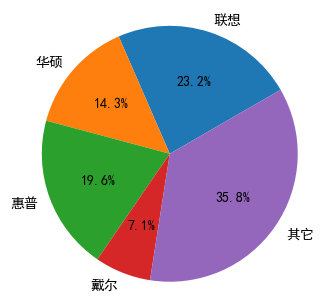

In [10]:
from window import Ui_MainWindow  # 导入主窗体类
from attention_window import Attention_MainWindow  # 导入关注窗体文件中的ui类
from heat_window import Heat_MainWindow  # 导入热卖排行榜窗体文件中的ui类
from evaluate_warning_window import Evaluate_Warning_MainWindow  # 导入评价预警窗体中的ui类
from price_warning_window import Price_Warning_MainWindow  # 导入价格预警窗体中的ui类
from about_window import About_MainWindow                  # 导入关于窗体ui类
# 导入Pyqt5
from PyQt5 import QtWidgets, QtCore, QtGui
from PyQt5.QtWidgets import QMainWindow, QApplication
import sys  # 导入系统模块

from mysql import MySQL  # 导入自定义数据库操作类
from crawl import Crawl  # 导入自定义爬虫类
mycrawl = Crawl()  # 创建爬虫类对象

mysql = MySQL() # 创建数据库对象
# 连接数据库
sql = mysql.connection_sql()
# 创建游标
cur = sql.cursor()


attention_info = ''  # 关注商品信息

from chart import PlotCanvas  # 导入自定义饼图类

import requests  # 网络请求


# 显示消息提示框，参数title为提示框标题文字，message为提示信息
def messageDialog(title, message):
    msg_box = QtWidgets.QMessageBox(QtWidgets.QMessageBox.Warning, title, message)
    msg_box.exec()


# 出窗体初始化类
class Main(QMainWindow, Ui_MainWindow):

    def __init__(self):
        super(Main, self).__init__()
        self.setupUi(self)

        # 获取热卖排行榜信息
        id_str = mycrawl.get_rankings_json('https://ch.jd.com/hotsale2?cateid=1105')
        rankings_list = mycrawl.get_price(id_str)  # 获取价格，然后在该方法中将所有数据保存至列表并返回
        mysql.insert_ranking(cur, rankings_list, 'jd_ranking')  # 将数据插入数据库

    # 显示前10名
    def show_top10(self):
        top_10_info = mysql.query_top10_info(cur)  # 查询排行数据表前10名商品名称,价格，好评率
        # 行数标记
        i = -1
        for n in range(10):
            # x 确定每行显示的个数 0，1，2 每行2个
            x = n % 2
            # 当x为0的时候设置换行 行数+1
            if x == 0:
                i += 1
            # 创建布局
            self.widget = QtWidgets.QWidget()
            # 给布局命名
            self.widget.setObjectName("widget" + str(n))
            # 设置布局样式
            self.widget.setStyleSheet('QWidget#' + "widget" + str(
                n) + "{border:2px solid rgb(175, 175, 175);background-color: rgb(255, 255, 255);}")

            # 创建个Qlabel控件用于显示图片 设置控件在QWidget中
            self.label = QtWidgets.QLabel(self.widget)
            # 设置大小
            self.label.setGeometry(QtCore.QRect(15, 15, 160, 160))
            # 设置要显示的图片
            self.label.setPixmap(QtGui.QPixmap('img_download/' + str(n) + '.jpg'))
            # 图片显示方式 让图片适应QLabel的大小
            self.label.setScaledContents(True)
            # 给显示图片的label控件命名
            self.label.setObjectName("img_download" + str(n))
            # 设置控件样式
            self.label.setStyleSheet('border:2px solid rgb(175, 175, 175);')

            # 显示好评的Label控件
            self.label_good = QtWidgets.QLabel(self.widget)
            # 给好评率控件命名
            self.label_good.setObjectName("good" + str(n))
            self.label_good.setGeometry(QtCore.QRect(24, 180, 141, 40))  # 设置控件位置及大小
            # 设置控件样式，边框与颜色
            self.label_good.setStyleSheet("border: 2px solid rgb(255, 148, 61);color: rgb(255, 148, 61);")
            self.label_good.setAlignment(QtCore.Qt.AlignCenter)  # 控件内文字居中显示
            self.label_good.setText('好评率' + top_10_info[n][2])  # 显示好评率的文字
            font = QtGui.QFont()    # 创建字体对象
            font.setPointSize(14)   # 设置字体大小
            font.setBold(True)     # 开启粗体属性
            font.setWeight(75)     # 设置文字粗细
            self.label_good.setFont(font) # 设置字体

            # 显示名称的Label控件
            self.label_name = QtWidgets.QLabel(self.widget)
            # 给显示名称控件命名
            self.label_name.setObjectName("good" + str(n))
            # 设置控件位置及大小
            self.label_name.setGeometry(QtCore.QRect(185, 30, 228, 80))
            self.label_name.setText(top_10_info[n][0])  # 设置显示名称的文字
            # 左上角为主显示文字
            self.label_name.setAlignment(QtCore.Qt.AlignLeft | QtCore.Qt.AlignTop)
            self.label_name.setWordWrap(True)  # 设置文字自动换行
            font = QtGui.QFont()  # 创建字体对象
            font.setPointSize(9)  # 设置字体大小
            font.setBold(True)    # 开启粗体属性
            font.setWeight(75)    # 设置文字粗细
            self.label_name.setFont(font)   # 设置字体

            # 显示价格的Label控件
            self.label_price = QtWidgets.QLabel(self.widget)
            # 给显示价格控件命名
            self.label_price.setObjectName("price" + str(n))
            # 设置控件位置及大小
            self.label_price.setGeometry(QtCore.QRect(265, 100, 228, 80))
            # 设置控件样式
            self.label_price.setStyleSheet("color: rgb(255, 0, 0);")
            self.label_price.setText('￥' + top_10_info[n][1])  # 设置显示的价格文字
            font = QtGui.QFont()    # 创建字体对象
            font.setPointSize(14)   # 设置字体大小
            font.setBold(True)     # 开启粗体属性
            font.setWeight(75)     # 设置文字粗细
            self.label_price.setFont(font)   # 设置字体

            # 显示关注按钮控件
            self.pushButton = QtWidgets.QPushButton(self.widget)
            # 给显示价格控件命名
            self.pushButton.setObjectName(str(n))
            # 设置控件位置及大小
            self.pushButton.setGeometry(QtCore.QRect(300, 160, 100, 50))
            font = QtGui.QFont()     # 创建字体对象
            font.setFamily("楷体")   # 设置字体
            font.setPointSize(18)    # 设置字体大小
            font.setBold(True)      # 开启粗体属性
            font.setWeight(75)      # 设置文字粗细
            self.pushButton.setFont(font)   # 设置字体
            # 设置关注按钮控件样式
            self.pushButton.setStyleSheet("background-color: rgb(223, 48, 51);color: rgb(255, 255, 255);")
            self.pushButton.setText('关注')   # 设置关注按钮显示的文字
            # 注册关注按钮信号槽
            self.pushButton.clicked.connect(self.attention_btn)
            # 把动态创建的widegt布局添加到gridLayout中 i，x分别代表：行数以及每行的个数
            self.gridLayout.addWidget(self.widget, i, x)
            # 设置高度为动态高度根据 行数确定高度 每行300
        self.scrollAreaWidgetContents.setMinimumHeight((i+1) * 240)
        # 设置网格布局控件动态高度
        self.gridLayoutWidget.setGeometry(QtCore.QRect(0, 0, 850, ((i+1) * 240)))

    # 关注按钮事件
    def attention_btn(self):
        # 获取信号源 点击的按钮
        sender = self.gridLayout.sender()
        global attention_info
        # 因为创建关注按钮对象名称是以0为起始，最后一个关注按钮为9，
        # 所以用单击按钮的对象名称+1作为数据库中的id
        attention_info = mysql.query_id_info(cur, int(sender.objectName()) + 1)
        # 将商品名称显示在关注窗体的编辑框内
        attention.lineEdit.setText(attention_info[0])
        attention.open()  # 显示关注窗体

    # 显示商品分类比例饼图
    def show_classification(self):
        name_all = mysql.query_rankings_name(cur, 'jd_ranking')  # 获取排行榜中所有商品名称
        name_number = len(name_all)  # 排行榜中所有商品数量
        number = 0   # 定义统计分类数量的变量
        remove_list = []  # 保存需要移除的商品名称
        class_list = []  # 保存所有分类比例数据列表

        # 获取联想占有比例
        for name in name_all:
            if '联想' in name:
                number += 1
        # 计算联想百分比
        mouse_ratio = float('%.1f' % ((number / name_number) * 100))
        class_list.append(mouse_ratio)
        # 获取华硕占有比例
        number = 0
        for name in name_all:
            if '华硕' in name:
                number += 1
        # 计算华硕百分比
        keyboard_ratio = float('%.1f' % ((number / name_number) * 100))
        class_list.append(keyboard_ratio)
        # 获取惠普占有比例
        number = 0
        for name in name_all:
            if '惠普' in name:
                number += 1
        # 计算惠普百分比
        u_ratio = float('%.1f' % ((number / name_number) * 100))
        class_list.append(u_ratio)
        # 获取戴尔占有比例
        number = 0
        for name in name_all:
            if '戴尔' in name:
                number += 1
        # 计算戴尔百分比
        move_ratio = float('%.1f' % ((number / name_number) * 100))
        class_list.append(move_ratio)
        # 计算其他百分比
        other_ratio = float('%.1f' % (100 - (mouse_ratio + keyboard_ratio + u_ratio + move_ratio)))
        class_list.append(other_ratio)
        pie = PlotCanvas()  # 创建饼图类对象
        pie.pie_chart(class_list)  # 调用显示饼图的方法
        self.horizontalLayout.addWidget(pie)  # 将饼图添加在主窗体的水平布局当中

    # 显示已经关注的商品名称
    def show_attention_name(self):
        self.name_list= []
        # 查询已经关注的商品信息
        row, column, results = mysql.query_evaluate_info(cur,'attention')
        if row !=0:
            for index,i in enumerate(results):
                self.name_list.append('关注商品'+str(index+1)+':\n'+i[1])  # 将关注商品名称添加至名称列表中
            # 设置字体
            font = QtGui.QFont()
            font.setPointSize(12)
            self.listView.setFont(font)
            # 设置列表内容不可编辑
            self.listView.setEditTriggers(QtWidgets.QAbstractItemView.NoEditTriggers)
            self.listView.setWordWrap(True)  # 自动换行
            model = QtCore.QStringListModel()  # 创建字符串列表模式
            model.setStringList(self.name_list)  # 设置字符串列表
            self.listView.setModel(model)  # 设置模式
        else:
            model = QtCore.QStringListModel()  # 创建字符串列表模式
            model.setStringList(self.name_list)  # 设置字符串列表
            self.listView.setModel(model)  # 设置模式

    # 更新预警信息按钮的单击事件处理方法
    def up(self):
        warningDialog = QtWidgets.QMessageBox.warning(self,
                                                      '警告', '关注商品的预警信息更新后，将以新的信息进行对比并预警！',
                                                      QtWidgets.QMessageBox.Yes | QtWidgets.QMessageBox.No)
        if warningDialog == QtWidgets.QMessageBox.Yes:
            # 查询已经关注的商品信息
            row, column, results = mysql.query_evaluate_info(cur,'attention')
            if row !=0:
                jd_id_str = ''
                for i in range(len(results)):
                    jd_id = 'J_' + results[i][3] + ','
                    jd_id_str = jd_id_str + jd_id
                price_url = 'http://p.3.cn/prices/mgets?type=1&skuIds={id_str}'
                response = requests.get(price_url.format(id_str=jd_id_str))  # 获取关注商品的价格
                price_json = response.json()  # 获取价格json数据，该数据为list类型
                for index, item in enumerate(results):
                    # 获取中评最新的时间,由于返回的关注商品信息中包含行与列信息所有进行i+2
                    middle_time = mycrawl.get_evaluation(2, item[3])
                    # 获取差评最新的时间
                    poor_time = mycrawl.get_evaluation(1, item[3])
                    price = price_json[index]['p']
                    up = "middle_time='{mi_time}',poor_time='{p_time}',jd_price='{price}'".format(
                        mi_time=middle_time,
                        p_time=poor_time, price=price)
                    # 更新关注商品的预警信息
                    mysql.update_attention(cur, 'attention', up, results[index][0])
                messageDialog('提示！','已更新预警信息！')
            else:
                messageDialog('警告！','您并没有关注某件商品！')
    def close_main(self):
        mysql.close_sql()  # 关掉数据库连接
        self.close()       # 关掉窗体

# 关注窗体初始化类
class Attention(QMainWindow, Attention_MainWindow):
    def __init__(self):
        super(Attention, self).__init__()
        self.setupUi(self)
        # 开启自动填充背景
        self.centralwidget.setAutoFillBackground(True)
        palette = QtGui.QPalette()  # 调色板类
        palette.setBrush(QtGui.QPalette.Background, QtGui.QBrush(
            QtGui.QPixmap('img_resources/attention_bg.png')))  # 设置背景图片
        self.centralwidget.setPalette(palette)  # 为控件设置对应的调色板即可
        # 设置背景透明
        self.pushButton_yes.setStyleSheet("background-color:rgba(0,0,0,0)")
        # 设置确认关注按钮的背景图片
        self.pushButton_yes.setIcon(QtGui.QIcon('img_resources/yes_btn.png'))
        # 设置按钮背景图大小
        self.pushButton_yes.setIconSize(QtCore.QSize(100, 50))
        # 设置背景透明
        self.pushButton_no.setStyleSheet("background-color:rgba(0,0,0,0)")
        # 设置确认关注按钮的背景图片
        self.pushButton_no.setIcon(QtGui.QIcon('img_resources/no_btn.png'))
        # 设置按钮背景图大小
        self.pushButton_no.setIconSize(QtCore.QSize(100, 50))

    # 打开关注窗体
    def open(self):
        self.show()

    def insert_attention_message(self, attention_info):
        is_identical = mysql.query_is_name(cur, attention_info[0])  # 判断数据库中是否已经关注了该商品
        if is_identical == 0:
            middle_time = mycrawl.get_evaluation(2, attention_info[2])
            poor_time = mycrawl.get_evaluation(1, attention_info[2])
            # 判断信息状态
            if middle_time != None and poor_time != None:
                attention_info = attention_info + (middle_time, poor_time)  # 将评价时间添加至商品数据中
                mysql.insert_attention(cur, [attention_info], 'attention')  # 插入关注信息
                messageDialog('提示！', '已关注' + attention_info[0])  # 提示
                attention.close()  # 关闭关注对话框
                main.show_attention_name() # 显示关注商品的名称
            else:
                print('无法获取评价时间！')
        else:
            messageDialog('警告！', '不可以关注相同的商品！')
            attention.close()
# 取消关注窗体初始化类
class Cancel_Attention(QMainWindow, Attention_MainWindow):
    def __init__(self):
        super(Cancel_Attention, self).__init__()
        self.setupUi(self)
        # 开启自动填充背景
        self.centralwidget.setAutoFillBackground(True)
        palette = QtGui.QPalette()  # 调色板类
        palette.setBrush(QtGui.QPalette.Background, QtGui.QBrush(
            QtGui.QPixmap('img_resources/cancel_attention_bg.png')))  # 设置背景图片
        self.centralwidget.setPalette(palette)  # 为控件设置对应的调色板即可
        # 设置背景透明
        self.pushButton_yes.setStyleSheet("background-color:rgba(0,0,0,0)")
        # 设置确认关注按钮的背景图片
        self.pushButton_yes.setIcon(QtGui.QIcon('img_resources/yes_btn.png'))
        # 设置按钮背景图大小
        self.pushButton_yes.setIconSize(QtCore.QSize(100, 50))
        # 设置背景透明
        self.pushButton_no.setStyleSheet("background-color:rgba(0,0,0,0)")
        # 设置确认关注按钮的背景图片
        self.pushButton_no.setIcon(QtGui.QIcon('img_resources/no_btn.png'))
        # 设置按钮背景图大小
        self.pushButton_no.setIconSize(QtCore.QSize(100, 50))

    # 显示取消关注的窗体
    def open(self,qModeIndex):
        # 在关注商品名称列表中，获取单击了哪一个商品的名称
        name = main.name_list[qModeIndex.row()].lstrip('关注商品'+str(qModeIndex.row()+1)+':\n')
        # 将商品名称显示在关注窗体的编辑框内
        cancel_attention.lineEdit.setText(name)
        cancel_attention.show()  # 显示关注窗体

    #  取消关注的方法
    def unfollow(self):
        # 获取编辑框内的商品名称
        name = cancel_attention.lineEdit.text()
        mysql.delete_attention(cur,name)
        main.show_attention_name()     # 显示关注商品名称列表
        cancel_attention.close()       # 关掉取消关注的窗体


# 热卖榜窗体初始化类
class Heat(QMainWindow, Heat_MainWindow):
    def __init__(self):
        super(Heat, self).__init__()
        self.setupUi(self)
        # 开启自动填充背景
        self.centralwidget.setAutoFillBackground(True)
        palette = QtGui.QPalette()  # 调色板类
        palette.setBrush(QtGui.QPalette.Background,
                         QtGui.QBrush(QtGui.QPixmap('img_resources/rankings_bg.png')))  # 设置背景图片
        self.centralwidget.setPalette(palette)  # 为控件设置对应的调色板即可
        # 获取热卖排行榜数据信息
        row, column, results = mysql.query_rankings(cur, 'jd_ranking')
        # 设置表格内容不可编辑
        self.tableWidget.setEditTriggers(QtWidgets.QAbstractItemView.NoEditTriggers)
        self.tableWidget.verticalHeader().setHidden(True)  # 隐藏行号
        self.tableWidget.setRowCount(row)  # 根据数据库内容设置表格行
        self.tableWidget.setColumnCount(column)  # 设置表格列
        # 设置表格头部
        self.tableWidget.setHorizontalHeaderLabels(['排名', '商品名称', '京东价', '京东id','好评率'])
        self.tableWidget.setStyleSheet("background-color:rgba(0,0,0,0)")  # 设置背景透明
        # 根据窗体大小拉伸表格
        self.tableWidget.horizontalHeader().setSectionResizeMode(
            QtWidgets.QHeaderView.ResizeToContents)
        for i in range(row):
            for j in range(column):
                temp_data = results[i][j]  # 临时记录，不能直接插入表格
                data = QtWidgets.QTableWidgetItem(str(temp_data))  # 转换后可插入表格
                self.tableWidget.setItem(i, j, data)               # 设置表格显示的数据

    # 打开热卖榜窗体
    def open(self):
        self.show()

    # 热卖榜窗体双击事件处理方法
    def heat_itemDoubleClicked(self):
        item = self.tableWidget.currentItem()  # 表格item对象
        # 判断是否是商品名称的列
        if item.column() == 1:
            # 将商品名称显示在关注窗体的编辑框内
            attention.lineEdit.setText(item.text())
            global attention_info
            # 查询需要关注商品的信息
            attention_info = mysql.query_id_info(cur, item.row() + 1)
            attention.open()  # 显示关注窗体

# 评价预警窗体初始化类
class Evaluate_Warning(QMainWindow, Evaluate_Warning_MainWindow):
    def __init__(self):
        super(Evaluate_Warning, self).__init__()
        self.setupUi(self)


    def open_warning(self):
        # 开启自动填充背景
        self.centralwidget.setAutoFillBackground(True)
        palette = QtGui.QPalette()  # 调色板类
        palette.setBrush(QtGui.QPalette.Background, QtGui.QBrush(QtGui.QPixmap('img_resources/evaluate_warning_bg.png')))  # 设置背景图片
        self.centralwidget.setPalette(palette)  # 为控件设置对应的调色板即可
        warning_list = []  # 保存评价分析后得数据
        # 查询关注商品的信息
        row, column, results = mysql.query_evaluate_info(cur, 'attention')
        # 设置表格内容不可编辑
        self.tableWidget.setEditTriggers(QtWidgets.QAbstractItemView.NoEditTriggers)
        self.tableWidget.verticalHeader().setHidden(True)  # 隐藏行号
        self.tableWidget.setRowCount(row)  # 根据数据库内容设置表格行
        self.tableWidget.setColumnCount(column-4)  # 设置表格列
        # 分别设置列宽度
        self.tableWidget.setColumnWidth(0,600)
        self.tableWidget.setColumnWidth(1,140)
        self.tableWidget.setColumnWidth(2,140)
        self.tableWidget.setStyleSheet("background-color:rgba(0,0,0,0)")  # 设置背景透明

        # 判断是否有关注商品的信息
        if row != 0:
            middle_time = ''
            poor_time = ''
            for i in range(len(results)):
                # 获取好评率与中评最新的时间
                new_middle_time = mycrawl.get_evaluation(2,results[i][3])
                # 获取差评最新的时间
                new_poor_time = mycrawl.get_evaluation(1,results[i][3])
                if results[i][5] == new_middle_time:
                    middle_time = '无'
                else:
                    middle_time = '有'
                if results[i][6] == new_poor_time:
                    poor_time = '无'
                else:
                    poor_time = '有'
                warning_list.append((results[i][1], middle_time, poor_time))
            for i in range(len(results)):
                for j in range(3):
                    temp_data = warning_list[i][j]  # 临时记录，不能直接插入表格
                    data = QtWidgets.QTableWidgetItem(str(temp_data))  # 转换后可插入表格
                    data.setTextAlignment(QtCore.Qt.AlignCenter)
                    evaluate.tableWidget.setItem(i, j, data)
            self.show()  # 显示窗体
        else:
            messageDialog('警告！', '您并没有关注某件商品！')


# 价格预警窗体初始化类
class Price_Warning(QMainWindow, Price_Warning_MainWindow):
    def __init__(self):
        super(Price_Warning, self).__init__()
        self.setupUi(self)

    # 价格信息处理
    def open_price(self):
        # 开启自动填充背景
        self.centralwidget.setAutoFillBackground(True)
        palette = QtGui.QPalette()  # 调色板类
        palette.setBrush(QtGui.QPalette.Background,
                         QtGui.QBrush(QtGui.QPixmap('img_resources/price_warning_bg.png')))  # 设置背景图片
        self.centralwidget.setPalette(palette)  # 为控件设置对应的调色板即可
        price_list = []  # 保存价格分析后的数据
        # 查询关注商品的信息
        row, column, results = mysql.query_evaluate_info(cur, 'attention')
        # 设置表格内容不可编辑
        self.tableWidget.setEditTriggers(QtWidgets.QAbstractItemView.NoEditTriggers)
        self.tableWidget.verticalHeader().setHidden(True)  # 隐藏行号
        self.tableWidget.setRowCount(row)  # 根据数据库内容设置表格行
        self.tableWidget.setColumnCount(column - 5)  # 设置表格列
        # 分别设置列宽度
        self.tableWidget.setColumnWidth(0, 600)
        self.tableWidget.setColumnWidth(1, 140)
        self.tableWidget.setStyleSheet("background-color:rgba(0,0,0,0)")  # 设置背景透明
        # 判断是否有关注的商品信息
        if row != 0:
            jd_id_str = ''
            for i in range(len(results)):
                jd_id = 'J_' + results[i][3] + ','
                jd_id_str = jd_id_str + jd_id
            price_url = 'http://p.3.cn/prices/mgets?type=1&skuIds={id_str}'
            response = requests.get(price_url.format(id_str=jd_id_str))  # 获取关注商品的价格
            price_json = response.json()  # 获取价格json数据，该数据为list类型
            change = ''
            for index, item in enumerate(price_json):
                # 京东价格
                new_jd_price = item['p']
                if float(results[index][2]) < float(new_jd_price):
                    change = '上涨'
                if float(results[index][2]) == float(new_jd_price):
                    change = '无'
                if float(results[index][2]) > float(new_jd_price):
                    change = '下浮'
                price_list.append((results[index][1], change))
            for i in range(len(results)):
                for j in range(2):
                    temp_data = price_list[i][j]  # 临时记录，不能直接插入表格
                    data = QtWidgets.QTableWidgetItem(str(temp_data))  # 转换后可插入表格
                    data.setTextAlignment(QtCore.Qt.AlignCenter)
                    price.tableWidget.setItem(i, j, data)
            self.show()
        else:
            messageDialog('警告！', '您并没有关注某件商品！')


# 关于窗体初始化类
class About_Window(QMainWindow, About_MainWindow):
    def __init__(self):
        super(About_Window, self).__init__()
        self.setupUi(self)



if __name__ == '__main__':
    app = QApplication(sys.argv) # 创建QApplication对象，作为GUI主程序入口
    main = Main()   # 创建主窗体对象
    # 关注窗体对象
    attention = Attention()
    # 取消关注窗体对象
    cancel_attention = Cancel_Attention()
    # 热卖排行榜窗体对象
    heat = Heat()
    # 评价预警窗体对象
    evaluate = Evaluate_Warning()
    # 价格预警窗体对象
    price = Price_Warning()
    main.show()
    main.show_top10()           # 显示前10名热卖榜图文信息
    main.show_classification()  # 显示商品分类比例饼图
    main.show_attention_name()  # 显示关注商品名称
    # 指定关注窗体按钮(是)单击事件处理方法
    attention.pushButton_yes.clicked.connect(
        lambda: attention.insert_attention_message(attention_info))
    # 指定关注窗体按钮（否）单击事件处理方法
    attention.pushButton_no.clicked.connect(attention.close)
    # 指定销量榜表格的双击事件处理方法
    heat.tableWidget.itemDoubleClicked.connect(heat.heat_itemDoubleClicked)
    # 指定打开热卖排行榜窗体的事件处理方法
    main.action_heat.triggered.connect(heat.open)
    # 指定打开关注商品评价预警窗体的事件处理方法
    main.action_evaluate.triggered.connect(evaluate.open_warning)
    # 指定打开关注商品价格预警窗体的事件处理方法
    main.action_price.triggered.connect(price.open_price)
    # 指定打开更新关注商品信息的对话框
    main.action_up.triggered.connect(main.up)
    # 指定显示关注商品名称列表事件
    main.listView.clicked.connect(cancel_attention.open)
    # 指定取消关注窗体按钮（是）单击事件处理方法
    cancel_attention.pushButton_yes.clicked.connect(cancel_attention.unfollow)
    # 指定取消关注窗体按钮（否）单击事件处理方法
    cancel_attention.pushButton_no.clicked.connect(cancel_attention.close)
    # 指定退出事件处理方法
    app.aboutToQuit.connect(app.deleteLater)
    app.exec_()
    
    print("主程序设计")
    print("游戏本价格信息检测")